<div style="border:solid green 2px; padding: 20px">
    
<b>Элеонора, 
    привет! Это Александр</b> Я рад тебя видеть на финальном спринте (Основной проект).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в слаке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

# Мобильные приложения - Выделение групп пользователей на основе поведения

# Введение: цель и основные этапы исследования 

Исследование будет проводится для мобильного приложения «Ненужные вещи». 

В процессе исследования надо будет выделить группы пользователей, которые различаются по метрикам:
1. retention rate,
2. время, проведённое в приложении,
3. частота действий,
4. конверсия в целевое действие — просмотр контактов.

После этого провести исследовательский анализ данных и сегментировать пользователей на основе вышеперечисленных действий.

После этого проверить следующие статистические гипотезы
1. Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверяем гипотезу: конверсия в просмотры контактов различается у этих двух групп.
2. Одни пользователи совершают действия tips_show и tips_click , другие —
только tips_show . Проверяем гипотезу: конверсия в просмотры контактов различается у этих двух групп.


Описание данных:
У нас есть два датасета, которые содержат данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений. В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.


<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Декомпозиция так и не расписана. Хорошо как-то анализировать задачи на вход и приводить понятные достижения цели с точки зрения основной бизнес задачи.
</div>

## Анализ и предобработка данных

Импортируем необходимые для работы библиотеки:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly import graph_objects as go
from IPython.display import display

import datetime as dt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
data.head(5)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Предлагаю разделять логически разные вещи:

    - импорты библиотек
    - открытие данных (это может быть не тривиальный процесс)
    - рабочий код
    
Такой подход позволит улучшить читаемость кода, снизит время поиска ошибок если они есть и исключит повторное выполнение кода

In [3]:
data1 = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
data1.head(5)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [4]:
total_e_ = data['user.id'].count()
display(total_e_)

74197

Общее количество событий в файле - 74.197.

In [5]:
total_e_u = data['user.id'].nunique()
display(total_e_u)

4293

Количество уникальный пользователей - 4.293.

In [6]:
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
data.duplicated().sum()

0

In [8]:
data['event.name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

In [9]:
data1.isna().sum()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [10]:
data1.duplicated().sum()

0

Дубликатов и пропущенных данных не обнаружено.

Переименовываем столбцы, чтобы можно было объединять таблицы.

In [11]:
data1 = data1.rename(columns={'userId': 'user.id'})

Находим и заменяем регулярные выражения.

In [12]:
data.replace(r"search_\d", 'search', inplace = True, regex = True)

Объединяем в одну целевую группу пользователей с событиями 'contacts_show' и 'show_contacts', согласно условиям задания.

In [13]:
data.replace('contacts_show','show_contacts', inplace = True)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Действительно, данные события можно объединить
</div>

In [14]:
data['event.name'].unique()

array(['advert_open', 'tips_show', 'map', 'show_contacts', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

Теперь данные готовы для дальнейшего исследования.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

На этом этапе всё хорошо. Ты корректно выгрузила данные и посмотрела их содержимое. Выполнила первичную проверку на пропуски и дубликаты. Можно приступать к следующему шагу
</div>

## Исследовательский анализ данных

### Исследовательский анализ поведения пользователей по retention rate 

In [15]:
data['active_date'] = data['event.time'].astype('datetime64[W]')
# здесь мы задаем текущую дату события в формате недели

In [16]:
# cгруппируем и найдем первый заход для каждого id
first_ts = data.groupby('user.id').agg({'event.time': 'min'}).reset_index()
first_ts = first_ts.rename(columns={'event.time':'first_ts'})
first_ts['first_ts'] = first_ts['first_ts'].astype('datetime64[W]')
first_ts.head(5)

,user.id,first_ts
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17
2,00463033-5717-4bf1-91b4-09183923b9df,2019-10-31
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-24


In [17]:
# объеденяем датасеты
data = first_ts.merge(data, on = 'user.id')

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


В реальной практике тебе придется обосновать почему именно 40 мин. Было бы неплохо аргументировать свое решение. От этого зависит сколько в целом у тебя получится уникальных сессий и повлияет на дальнейшие расчеты.

</div>

In [18]:
#преобразуем в формат даты datetimes
data['event.time'] = pd.to_datetime(data['event.time'])
#устанавливаем разницу в 40 минут для определения длины сессии
g = (data.groupby('user.id')['event.time'].diff() > pd.Timedelta('40Min')).cumsum()
#создаем счетчик групп
data['session_id'] = data.groupby(['user.id', g], sort=False).ngroup() + 1
data.head(5)

,user.id,first_ts,event.time,event.name,active_date,session_id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:39:45.989359,tips_show,2019-10-03,1
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:40:31.052909,tips_show,2019-10-03,1
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:41:05.722489,tips_show,2019-10-03,1
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:43:20.735461,tips_show,2019-10-03,1
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:45:30.917502,tips_show,2019-10-03,1


In [19]:
data['seniority'] = (data['active_date'] - data['first_ts']).dt.days + 1
data.head(5)

,user.id,first_ts,event.time,event.name,active_date,session_id,seniority
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:39:45.989359,tips_show,2019-10-03,1,1
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:40:31.052909,tips_show,2019-10-03,1,1
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:41:05.722489,tips_show,2019-10-03,1,1
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:43:20.735461,tips_show,2019-10-03,1,1
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:45:30.917502,tips_show,2019-10-03,1,1


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Сессии выделены корректно

In [20]:
group = data.groupby(['first_ts', 'seniority'])

In [21]:
cohort_data = group['user.id'].size()

In [22]:
cohort_data

first_ts    seniority
2019-10-03  1             7071
            8             1846
            15            1680
            22             893
            29             642
2019-10-10  1            15391
            8             3812
            15            2657
            22             889
2019-10-17  1            13342
            8             4074
            15            1137
2019-10-24  1            13272
            8             2195
2019-10-31  1             5296
Name: user.id, dtype: int64

In [23]:
cohort_data = cohort_data.reset_index()

In [24]:
cohort_counts = cohort_data.pivot(index='first_ts', columns='seniority', values='user.id')

In [25]:
cohort_counts

seniority,1,8,15,22,29
first_ts,,,,,
2019-10-03,7071.0,1846.0,1680.0,893.0,642.0
2019-10-10,15391.0,3812.0,2657.0,889.0,NaN
2019-10-17,13342.0,4074.0,1137.0,NaN,NaN
2019-10-24,13272.0,2195.0,NaN,NaN,NaN
2019-10-31,5296.0,NaN,NaN,NaN,NaN


In [26]:
base = cohort_counts[1]

In [27]:
retention = cohort_counts.divide(base, axis=0).round(3)
retention

seniority,1,8,15,22,29
first_ts,,,,,
2019-10-03,1.0,0.261,0.238,0.126,0.091
2019-10-10,1.0,0.248,0.173,0.058,NaN
2019-10-17,1.0,0.305,0.085,NaN,NaN
2019-10-24,1.0,0.165,NaN,NaN,NaN
2019-10-31,1.0,NaN,NaN,NaN,NaN


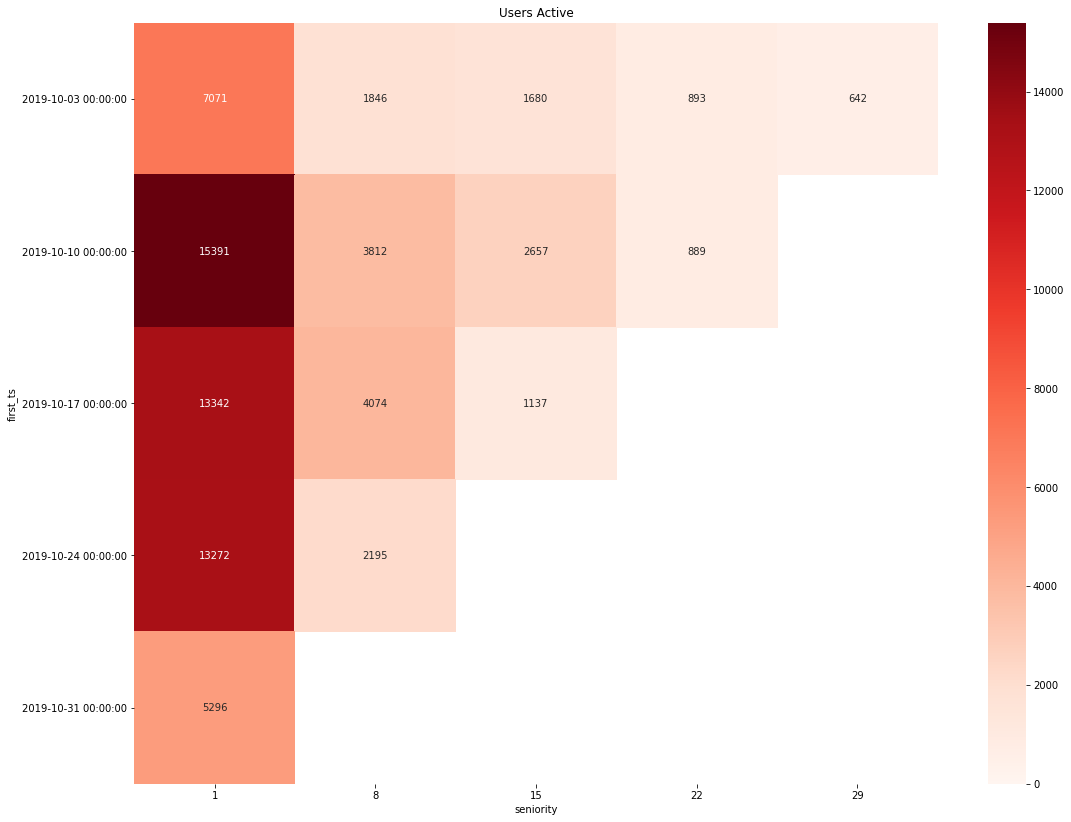

In [28]:
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Reds', fmt = "g")
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()
fig.savefig("Retention Counts.png")
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

А для чего тут e-значения?

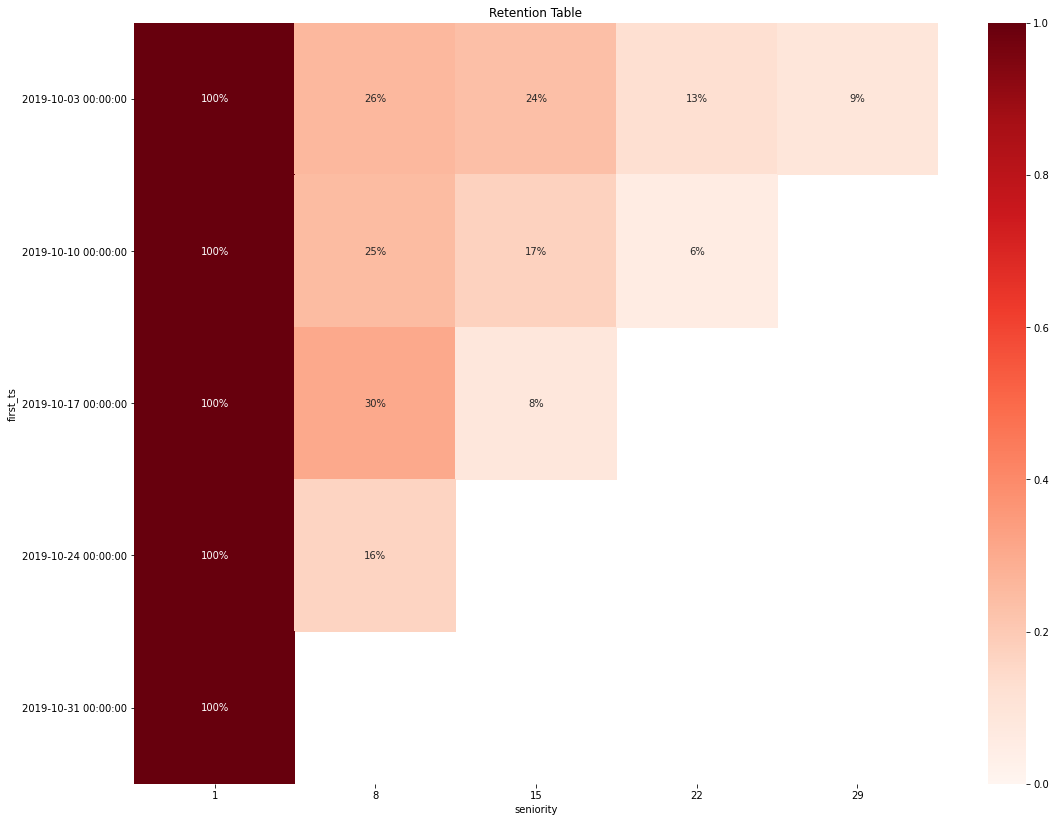

In [29]:
plt.figure(figsize=(18,14))
plt.title('Retention Table')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")
plt.show()

По удержанию пользователей можно сделать вывод, что интерес пользователя ослабевает после второй недели использования приложения Ненужные вещи.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Отлично! Retention rate рассчитан верно и тепловая карта оформлена корректно
</div>

### Исследовательский анализ поведения пользователей по времени, проведенном в приложении 

In [30]:
# cгруппируем и найдем первый заход для каждой сессии
first_ss = data.groupby('session_id').agg({'event.time': 'min'}).reset_index()

first_ss = first_ss.rename(columns={'event.time':'first_ss'})
first_ss['first_ss'] = first_ss['first_ss'].astype('datetime64')
display(first_ss)

,session_id,first_ss
0,1,2019-10-07 13:39:45.989359
1,2,2019-10-09 18:33:55.577963
2,3,2019-10-21 19:52:30.778932
3,4,2019-10-22 11:18:14.635436
4,5,2019-10-19 21:34:33.849769
...,...,...
10024,10025,2019-11-02 01:16:48.947231
10025,10026,2019-11-02 18:01:27.094834
10026,10027,2019-11-02 19:25:53.794029
10027,10028,2019-11-03 14:32:55.956301


In [31]:
last_ss = data.groupby('session_id').agg({'event.time': 'max'}).reset_index()
last_ss = last_ss.rename(columns={'event.time':'last_ss'})
last_ss['last_ss'] = last_ss['last_ss'].astype('datetime64')
last_ss.head(3)

,session_id,last_ss
0,1,2019-10-07 13:49:41.716617
1,2,2019-10-09 18:42:22.963948
2,3,2019-10-21 20:07:30.051028


In [32]:
last_ss = first_ss.merge(last_ss, on='session_id', how='left')
last_ss.head(3)


,session_id,first_ss,last_ss
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948
2,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028


In [33]:
last_ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10029 entries, 0 to 10028
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   session_id  10029 non-null  int64         
 1   first_ss    10029 non-null  datetime64[ns]
 2   last_ss     10029 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 313.4 KB


In [34]:
last_ss['length_ss'] = (last_ss['last_ss'] - last_ss['first_ss'])
last_ss['len_sek'] = last_ss['length_ss'].dt.total_seconds()
last_ss.head(3)

,session_id,first_ss,last_ss,length_ss,len_sek
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,0 days 00:09:55.727258,595.727258
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,0 days 00:08:27.385985,507.385985
2,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,0 days 00:14:59.272096,899.272096


In [35]:
last_ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10029 entries, 0 to 10028
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   session_id  10029 non-null  int64          
 1   first_ss    10029 non-null  datetime64[ns] 
 2   last_ss     10029 non-null  datetime64[ns] 
 3   length_ss   10029 non-null  timedelta64[ns]
 4   len_sek     10029 non-null  float64        
dtypes: datetime64[ns](2), float64(1), int64(1), timedelta64[ns](1)
memory usage: 470.1 KB


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

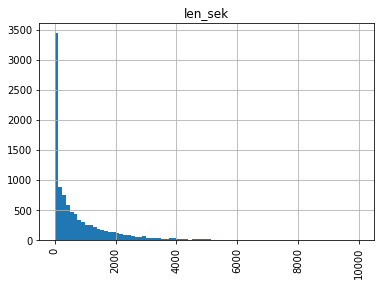

In [36]:
last_ss.hist('len_sek',bins=80, range=(0, 10000))
plt.xticks(rotation=90)

In [37]:
last_ss['len_sek'].describe()

count    10029.000000
mean       868.962482
std       1389.353050
min          0.000000
25%         28.887504
50%        360.572400
75%       1148.100930
max      22055.837396
Name: len_sek, dtype: float64

Среднее по времени использования приложения в два раза больше медианы: это значит, что есть несколько очень больших значений, которые влияют на среднее, но не на медиану.

In [38]:
min_session = last_ss.query('len_sek == 0')['session_id']
min_session.head(3)

9     10
19    20
26    27
Name: session_id, dtype: int64

In [39]:
min_session1 = data.merge(min_session)
min_session1.head(3)

,user.id,first_ts,event.time,event.name,active_date,session_id,seniority
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-11-03 17:12:09.708771,show_contacts,2019-10-31,10,15
1,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-24,2019-10-29 02:17:12.342406,photos_show,2019-10-24,20,1
2,00753c79-ea81-4456-acd0-a47a23ca2fb9,2019-10-17,2019-10-20 14:57:06.080501,show_contacts,2019-10-17,27,1


In [40]:
min_session2 = min_session1.groupby(['event.name']).agg({'session_id':'count'}).sort_values(by='session_id', ascending=False)
min_session2

,session_id
event.name,
tips_show,810
photos_show,470
search,361
show_contacts,123
map,92
advert_open,40
favorites_add,28
tips_click,10


Самымы популярными событиями с нулевой продолжительностью стали просмотр фотографий и клики на рекомендованные объявления. Общее количество нулевых событий порядка 2%. Пока примем решение не удалять эти события из выборки.

In [41]:
max_session = last_ss.query('len_sek == len_sek.max()')['session_id']
display(max_session)

6026    6027
Name: session_id, dtype: int64

In [42]:
max_session1 = data.query('session_id == 6027')

In [43]:
data.query('session_id == 6027')['event.name'].count()

288

In [44]:
max_session2 = max_session1.groupby(['event.name']).agg({'session_id':'count'}).sort_values(by='session_id', ascending=False)
max_session2

,session_id
event.name,
tips_show,115
map,71
favorites_add,61
advert_open,40
search,1


In [45]:
data['day_date'] = data['event.time'].apply(lambda x: x.date())
data.head(5)

,user.id,first_ts,event.time,event.name,active_date,session_id,seniority,day_date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:39:45.989359,tips_show,2019-10-03,1,1,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:40:31.052909,tips_show,2019-10-03,1,1,2019-10-07
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:41:05.722489,tips_show,2019-10-03,1,1,2019-10-07
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:43:20.735461,tips_show,2019-10-03,1,1,2019-10-07
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:45:30.917502,tips_show,2019-10-03,1,1,2019-10-07


In [46]:
data2 = data.query("session_id != 6027")
data2.head(5)

,user.id,first_ts,event.time,event.name,active_date,session_id,seniority,day_date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:39:45.989359,tips_show,2019-10-03,1,1,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:40:31.052909,tips_show,2019-10-03,1,1,2019-10-07
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:41:05.722489,tips_show,2019-10-03,1,1,2019-10-07
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:43:20.735461,tips_show,2019-10-03,1,1,2019-10-07
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:45:30.917502,tips_show,2019-10-03,1,1,2019-10-07


Есть также сессии с аномально большим количеством событий. За период в более чем 6 часов было совершено 288 событий. Скорее всего просмотр проводила какая-то программа, поэтому приняли решение удалить эту аномальную сессию.

В среднем пользователи проводят в приложении 360 секунд или 6 минут за одну сессию.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Всё верно. Согласен с расчетом
</div>

### Исследовательский анализ поведения пользователей по частоте действий

In [47]:
frequency = data.groupby(['day_date']).agg({'event.name':'count'}).sort_values(by='day_date', ascending=False)
frequency

,event.name
day_date,
2019-11-03,2861
2019-11-02,1853
2019-11-01,2577
2019-10-31,2868
2019-10-30,2877
2019-10-29,3196
2019-10-28,3184
2019-10-27,2861
2019-10-26,3127


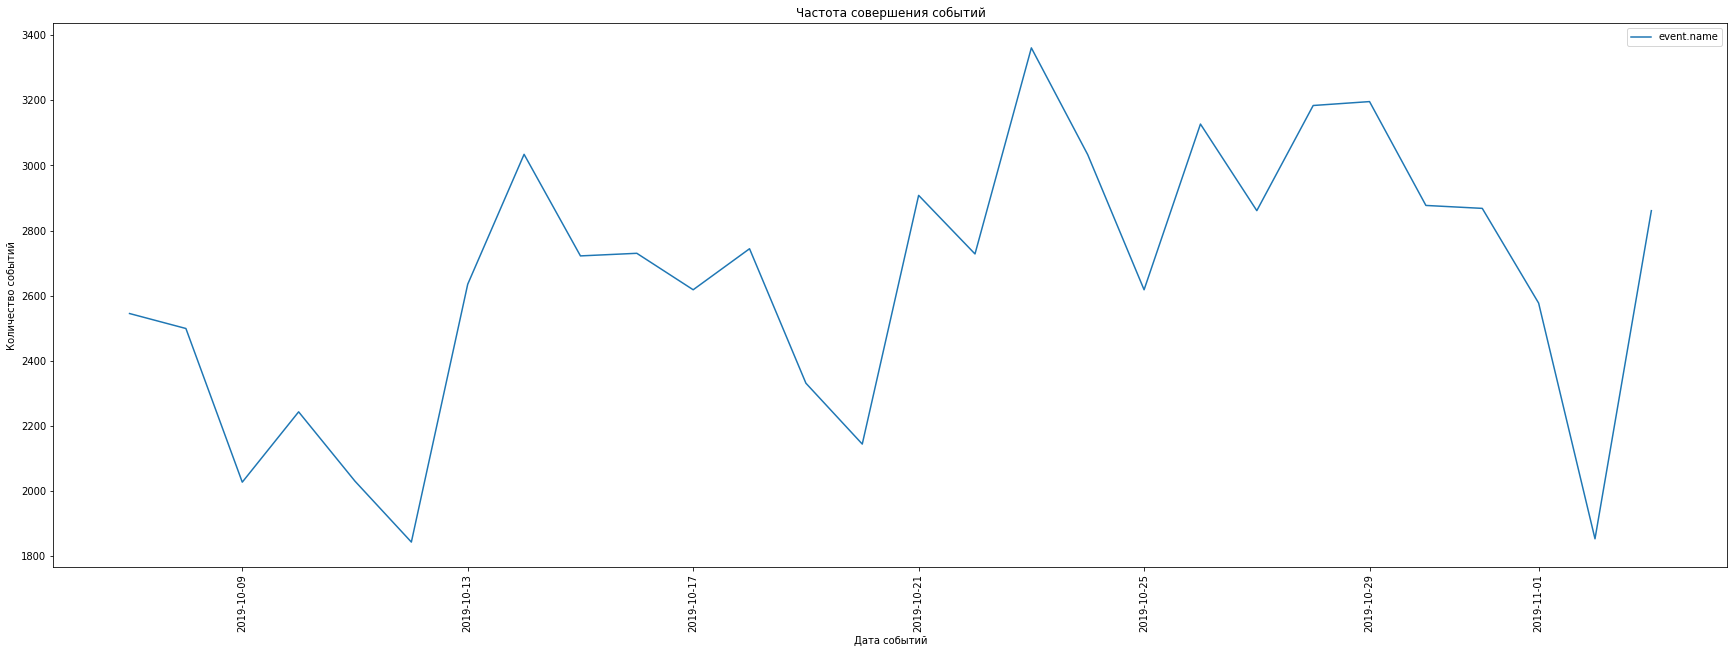

In [48]:
gr1 = frequency.plot(figsize=(30, 10))
plt.title('Частота совершения событий')
plt.xticks(rotation=90)
plt.xlabel('Дата событий')
plt.ylabel('Количество событий')
plt.show()

Частота совершения событий достаточно стабильна и колеблется от 1843 до 3361 в день. При это наблюдается уменьшение частоты к концу недели и увелечение частоты в середине рабочей недели. Кроме того, можно таже сказать, что к концу месяца наблюдется общая тенденцию к повышению частоты совершения событий пользователями.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__

Во многих продуктах в выходные наблюдается спад активности. Все стараются максимально использовать это время для отдыха, семьи и т.д. Так что вполне логичные результаты.
    
Еще советую, на таких графиках добавлять окно скользящего среднего по 7 дням (распространнная тема для наглядности) - https://www.geeksforgeeks.org/how-to-make-a-time-series-plot-with-rolling-average-in-python/
</div>

### Исследовательский анализ поведения пользователей по конверсии

In [49]:
total_users = data.query('`event.name` != "contacts_call"')
total_users_nu = total_users['user.id'].nunique()
total_users_nu

4293

In [50]:
total_users = data.query('`event.name` == "show_contacts"')
total_users_sc = total_users['user.id'].nunique()
total_users_sc

981

In [51]:
CR = (total_users_sc/total_users_nu)*100
round(CR, 2)

22.85

В среднем почти каждый пятый пользователь просматривает контакты и следовательно доходит до целевого события.

В данных представлена информация по 4293 уникальным пользователям. В результате анализа данных один из пользователей с аномально большими значениями по кличеству событий был удален из исследования в связи с тем, что было сделано предположение, что это программа (бот), а не реальный пользователь. Общее количество нулевых событий порядка 2%. Приняли решение не удалять эти события из выборки. После всех преобразований, разница между средним и медианой по времени использования приложения уменьшилась.

По удержанию пользователей можно сделать вывод, что интерес пользователя ослабевает после второй недели использования приложения Ненужные вещи.
Самымы популярными событиями с нулевой продолжительностью стали просмотр фотографий и клики на рекомендованные объявления. 

В среднем пользователи проводят в приложении 360 секунд или 6 минут за одну сессию.
Частота совершения событий достаточно стабильна и колеблется от 1843 до 3361 в день. При это наблюдается уменьшение частоты к концу недели и увелечение частоты в середине рабочей недели. Кроме того, можно таже сказать, что к концу месяца наблюдется общая тенденцию к повышению частоты совершения событий пользователями.

В среднем почти каждый пятый пользователь просматривает контакты и следовательно доходит до целевого события.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Конверсия рассчитана корректно

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Тут важно дать вывод по разделу, в котором стоит отписать общее поведение пользоваталей
</div>

## Сегментация пользователей на основе проведенного исследовательского анализа

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__
    
В реальной практике тебе придется обосновать почему именно такое разделение. Чем полезно будет исследовать такие группы пользователей для заказчика? Было бы неплохо развернуто расписать свою идею) Предположить какие результаты получишь и сравнивать ожидание\реальность

</div>

### Расчет конверсии по каждой группе пользователей при сегментации по браузерам

In [52]:
data_total_1 = data2.merge(data1, on='user.id', how='left')
data_total_1.head(5)

,user.id,first_ts,event.time,event.name,active_date,session_id,seniority,day_date,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:39:45.989359,tips_show,2019-10-03,1,1,2019-10-07,other
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:40:31.052909,tips_show,2019-10-03,1,1,2019-10-07,other
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:41:05.722489,tips_show,2019-10-03,1,1,2019-10-07,other
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:43:20.735461,tips_show,2019-10-03,1,1,2019-10-07,other
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-03,2019-10-07 13:45:30.917502,tips_show,2019-10-03,1,1,2019-10-07,other


In [53]:
data_total_1['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

In [54]:
data_total_g = data_total_1.query('source == "google"')

In [55]:
total_users_g = data_total_g.query('`event.name` != "contacts_call"')
total_users_g = total_users_g['user.id'].nunique()
total_users_g

1129

In [56]:
total_users_g_sc = data_total_g.query('`event.name` == "show_contacts"')
total_users_g_sc = total_users_g_sc['user.id'].nunique()
total_users_g_sc

275

In [57]:
CR = (total_users_g_sc/total_users_g)*100
round(CR, 2)

24.36

In [58]:
data_total_y = data_total_1.query('source == "yandex"')

In [59]:
total_users_y = data_total_y.query('`event.name` != "contacts_call"')
total_users_y = total_users_y['user.id'].nunique()
total_users_y

1934

In [60]:
total_users_y_sc = data_total_y.query('`event.name` == "show_contacts"')
total_users_y_sc = total_users_y_sc['user.id'].nunique()
total_users_y_sc

478

In [61]:
CR = (total_users_y_sc/total_users_y)*100
round(CR, 2)

24.72

In [62]:
data_total_o = data_total_1.query('source == "other"')

In [63]:
total_users_o = data_total_o.query('`event.name` != "contacts_call"')
total_users_o = total_users_o['user.id'].nunique()
total_users_o

1230

In [64]:
total_users_o_sc = data_total_o.query('`event.name` == "show_contacts"')
total_users_o_sc = total_users_o_sc['user.id'].nunique()
total_users_o_sc

228

In [65]:
CR = (total_users_o_sc/total_users_o)*100
round(CR, 2)

18.54

Самая высокая конверсия у пользователей, пришедших из браузера yandex. Она составляет почти 25%, что говорит о том, что каждый четвертый пользователь доходит до целевого события.  Самая низкая конверсия у прочих браузеров. До целевого обытия доходит порядка 19% пользователей, то есть меньше, чем каждый пятый. Сразу же после yandex идут пользователи  google. Разница между ними в конверсии практически отсутствует.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Да, результаты получились интересными
</div>

### Расчет частоты совершения событий по каждой группе пользователей при сегментации по браузерам

In [66]:
frequency_g = data_total_g.groupby(['day_date']).agg({'event.name':'count'}).sort_values(by='day_date', ascending=False)
frequency_g

,event.name
day_date,
2019-11-03,893
2019-11-02,459
2019-11-01,747
2019-10-31,702
2019-10-30,637
2019-10-29,927
2019-10-28,902
2019-10-27,848
2019-10-26,932


In [67]:
frequency_y = data_total_y.groupby(['day_date']).agg({'event.name':'count'}).sort_values(by='day_date', ascending=False)
frequency_y

,event.name
day_date,
2019-11-03,1392
2019-11-02,772
2019-11-01,1096
2019-10-31,1238
2019-10-30,1309
2019-10-29,1332
2019-10-28,1333
2019-10-27,1304
2019-10-26,1441


In [68]:
frequency_o = data_total_o.groupby(['day_date']).agg({'event.name':'count'}).sort_values(by='day_date', ascending=False)
frequency_o

,event.name
day_date,
2019-11-03,576
2019-11-02,622
2019-11-01,734
2019-10-31,928
2019-10-30,931
2019-10-29,937
2019-10-28,949
2019-10-27,709
2019-10-26,754


In [69]:
data_total_1.pivot_table(index=['day_date'], columns= ['source'], values=['event.name'], aggfunc= 'count')

event.name             
source         google other yandex
day_date                          
2019-10-07        706   590   1249
2019-10-08        591   542   1078
2019-10-09        592   461    974
2019-10-10        484   727   1032
2019-10-11        541   522    967
2019-10-12        377   417   1049
2019-10-13        565   670   1400
2019-10-14        630   826   1578
2019-10-15        616   787   1319
2019-10-16        927   757   1046
2019-10-17        912   630   1076
2019-10-18        784   588   1372
2019-10-19        883   509    939
2019-10-20        562   508   1074
2019-10-21        781   823   1304
2019-10-22        932   736   1060
2019-10-23       1090   849   1422
2019-10-24        838   734   1461
2019-10-25        587   650   1381
2019-10-26        932   754   1441
2019-10-27        848   709   1304
2019-10-28        902   949   1333
2019-10-29        927   937   1332
2019-10-30        637   931   1309
2019-10-31        702   928   1238
2019-11-01        747   734   1096
2019-11-02        459   622    772
2019-11-03        893   576   1392

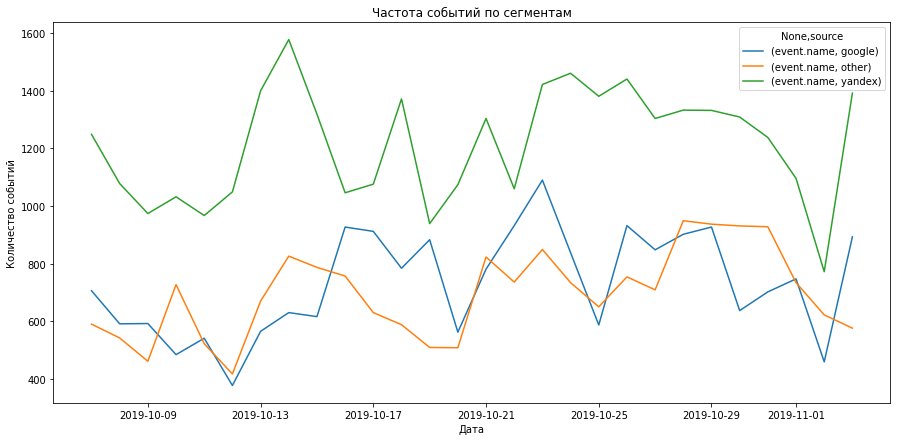

In [70]:
data_total_1.pivot_table(index=['day_date'], columns= ['source'], values=['event.name'], aggfunc= 'count').plot(figsize=(15, 7))
plt.title('Частота событий по сегментам')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show()

Явное преимущество в частоте совершения событий наблюдается у пользователей браузера yandex. По частоте совершения событий пользователи google и других браузеров приблизительно равны. При этом они отстаю от пользователей браузера yandex в 1,5-2 раза.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Тут согласен

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

В ответах на вопросы заказчика нужно рассмотеть: сегменты в разрезе конверсии и Retention Rate. А тепловые карты отсуствуют. Добавь, пожалуйста

### Расчет конверсии по группе пользователей по кликам и просмотрам рекомендованных объявлений

Одни пользователи совершают действия tips_show и tips_click , другие — только tips_show. То есть одни пользователи только смотрят рекомендованным объявлениям, но не кликают, а другие - и кликают, и просмотривают, то есть их можно назвать более ответственными пользователями. 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Сегментация должна охватывать всю аудиторию и отталкиваться от признаков поведения и активности пользователей. 
`по кликам и просмотрам рекомендованных объявлений` - ты же берешь лишь один признак, не учитывая другие

In [71]:
data_ts_tc = data_total_1.pivot_table(index='user.id', columns= 'event.name', values='event.time', aggfunc= 'count').reset_index()
data_ts_tc['tips'] = data_ts_tc['tips_click'].apply(lambda x: x>0.0)
data_ts_tc.head(5)

event.name,user.id,advert_open,contacts_call,favorites_add,map,photos_show,search,show_contacts,tips_click,tips_show,tips
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,29.0,False
1,00157779-810c-4498-9e05-a1e9e3cedf93,2.0,5.0,2.0,NaN,33.0,18.0,11.0,NaN,NaN,False
2,00463033-5717-4bf1-91b4-09183923b9df,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,False
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,5.0,NaN,NaN,6.0,NaN,17.0,NaN,NaN,4.0,False
4,00551e79-152e-4441-9cf7-565d7eb04090,NaN,3.0,NaN,NaN,1.0,1.0,3.0,NaN,NaN,False


In [108]:
data_ts_tc_1 = data_ts_tc.query('tips_click > 0.0 & tips_show > 0.0')
data_ts_tc_1.describe()

event.name,advert_open,contacts_call,favorites_add,map,photos_show,search,show_contacts,tips_click,tips_show
count,58.000000,0.0,28.000000,140.00000,4.000000,74.000000,91.000000,297.000000,297.000000
mean,10.603448,NaN,5.535714,4.65000,3.250000,4.310811,9.208791,2.360269,30.202020
std,13.050428,NaN,5.252739,8.84879,2.217356,5.050229,21.163132,2.757331,44.302625
min,1.000000,NaN,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,NaN,1.000000,1.00000,1.750000,2.000000,1.000000,1.000000,7.000000
50%,5.000000,NaN,4.000000,2.00000,3.000000,3.000000,2.000000,1.000000,15.000000
75%,15.500000,NaN,8.250000,5.00000,4.500000,4.000000,5.000000,3.000000,33.000000
max,76.000000,NaN,19.000000,68.00000,6.000000,27.000000,137.000000,30.000000,346.000000


In [104]:
data_ts_tc_2 = data_ts_tc.query('tips_click > 0.0 & tips_show <= 0.0')
data_ts_tc_2.describe()

event.name,advert_open,contacts_call,favorites_add,map,photos_show,search,show_contacts,tips_click,tips_show
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
data_ts_tc_3 = data_ts_tc.query('tips_click <= 0.0 & tips_show > 0.0')
data_ts_tc_3.describe()

event.name,advert_open,contacts_call,favorites_add,map,photos_show,search,show_contacts,tips_click,tips_show
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
data_ts_tc_4 = data_ts_tc.query('tips_click <= 0.0 & tips_show <= 0.0')
data_ts_tc_4.describe()

event.name,advert_open,contacts_call,favorites_add,map,photos_show,search,show_contacts,tips_click,tips_show
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
tips = data_ts_tc[['user.id','tips']]
tips.head(5)

event.name,user.id,tips
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False
1,00157779-810c-4498-9e05-a1e9e3cedf93,False
2,00463033-5717-4bf1-91b4-09183923b9df,False
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,False
4,00551e79-152e-4441-9cf7-565d7eb04090,False


In [73]:
data_total_1 = tips.merge(data_total_1, on='user.id', how='left')
data_total_1.head(5)

,user.id,tips,first_ts,event.time,event.name,active_date,session_id,seniority,day_date,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,2019-10-03,2019-10-07 13:39:45.989359,tips_show,2019-10-03,1,1,2019-10-07,other
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,2019-10-03,2019-10-07 13:40:31.052909,tips_show,2019-10-03,1,1,2019-10-07,other
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,2019-10-03,2019-10-07 13:41:05.722489,tips_show,2019-10-03,1,1,2019-10-07,other
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,2019-10-03,2019-10-07 13:43:20.735461,tips_show,2019-10-03,1,1,2019-10-07,other
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,2019-10-03,2019-10-07 13:45:30.917502,tips_show,2019-10-03,1,1,2019-10-07,other


In [74]:
data_total_tips = data_total_1.query('tips == True')

In [75]:
total_users_tips = data_total_tips.query('`event.name` != "contacts_call"')
total_users_tips = total_users_tips['user.id'].nunique()
total_users_tips

322

In [76]:
total_users_tips_sc = data_total_tips.query('`event.name` == "show_contacts"')
total_users_tips_sc = total_users_tips_sc['user.id'].nunique()
total_users_tips_sc

100

In [77]:
CR = (total_users_tips_sc/total_users_tips)*100
round(CR, 2)

31.06

In [78]:
data_total_non_tips = data_total_1.query('tips == False')

In [79]:
total_users_non_tips = data_total_non_tips.query('`event.name` != "contacts_call"')
total_users_non_tips = total_users_non_tips['user.id'].nunique()
total_users_non_tips

3971

In [80]:
total_users_non_tips_sc = data_total_non_tips.query('`event.name` == "show_contacts"')
total_users_non_tips_sc = total_users_non_tips_sc['user.id'].nunique()
total_users_non_tips_sc

881

In [81]:
CR = (total_users_non_tips_sc/total_users_non_tips)*100
round(CR, 2)

22.19

Конверсия в просмотры контактов различается у этих двух групп. Те пользователи, которые и кликают, и просмаотривают рекомендованные объявления, чаще доходят до целевого события по просмотру контактов.


### Расчет частоты совершения событий по  кликам и просмотрам рекомендованных объявлений пользователями

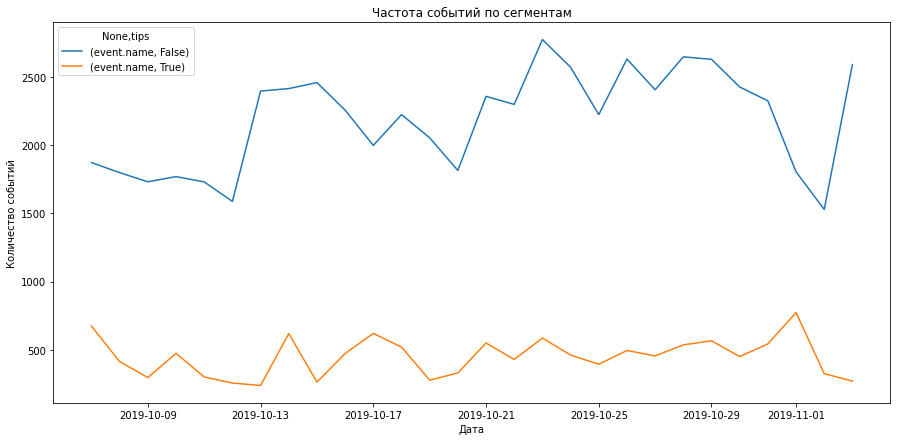

In [82]:
data_total_1.pivot_table(index=['day_date'], columns= ['tips'], values=['event.name'], aggfunc= 'count').plot(figsize=(15, 7))
plt.title('Частота событий по сегментам')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show()

Частота событий почти в два раза выше у тех. кто не кликает на рекомендованные объявления.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Тут важно описать результаты по разделу. Какая группа у нас получилась целевой, а какие - смежными и т.п.
</div>

 ## Формулирование и проверка гипотез

Проверка гипотез: конверсия пользователей браузеров Google и Yandex
        Нулевая гипотеза: конверсии пользователей браузеров Google и Yandex равны
        Альтернативная гипотеза: конверсии пользователей браузеров Google и Yandex не равны

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верная интерпритация нулевой и альтернативной гипотез
</div>

In [83]:
from scipy import stats as st
import numpy as np
import math as mth

alpha = 0.05  # критический уровень статистической значимости

purchases = np.array([total_users_g_sc, total_users_y_sc])
leads = np.array([total_users_g, total_users_y])

# ваш код
p1 = purchases[0]/leads[0]
p2 = purchases[1]/leads[1]
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined)*(1/leads[0] + 1/leads[1])) 
                               
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2# ваш код

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


То есть конверсии пользователей по браузерам почти не отличаются и делать упор на сегментацю по этому признаку не имеет смысла.

Одни пользователи совершают действия tips_show и tips_click , другие — только tips_show . Проверяем гипотезу: конверсия в просмотры контактов различается у этих двух групп.


Проверка гипотез: конверсия пользователей, которые кликают на рекомендованные объявления tips_click
        Нулевая гипотеза: конверсии пользователей двух групп равны
        Альтернативная гипотеза: конверсии пользователей двух групп не равны

In [84]:
from scipy import stats as st
import numpy as np
import math as mth

alpha = 0.05  # критический уровень статистической значимости

purchases = np.array([total_users_non_tips_sc, total_users_tips_sc])
leads = np.array([total_users_non_tips, total_users_tips])

# ваш код
p1 = purchases[0]/leads[0]
p2 = purchases[1]/leads[1]
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined)*(1/leads[0] + 1/leads[1])) 
                               
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2# ваш код

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.00026645646284051416
Отвергаем нулевую гипотезу: между долями есть значимая разница


Пользователи, которые кликают на рекомендованные объявления, гораздо чаще доходят до целевого события по просмотру контактов.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Методологически проверка гипотез проведена верно и наглядный вывод результатов. Так держать!
</div>

 ## Выводы

По удержанию пользователей можно сделать вывод, что интерес пользователя ослабевает после второй недели использования приложения Ненужные вещи.
Частота совершения событий достаточно стабильна и колеблется от 1843 до 3361 в день. При это наблюдается уменьшение частоты к концу недели и увелечение частоты в середине рабочей недели. Кроме того, можно таже сказать, что к концу месяца наблюдется общая тенденцию к повышению частоты совершения событий пользователями.
В среднем пользователи проводят в приложении 360 секунд или 6 минут за одну сессию.
Почти каждый пятый пользователь просматривает контакты и следовательно доходит до целевого события.

Самая высокая конверсия у пользователей, пришедших из браузера yandex. Она составляет почти 25%, что говорит о том, что каждый четвертый пользователь доходит до целевого события.  Самая низкая конверсия у прочих браузеров. До целевого обытия доходит порядка 19% пользователей, то есть меньше, чем каждый пятый. Сразу же после yandex идут пользователи  google. Разница между ними в конверсии практически отсутствует.

Явное преимущество в частоте совершения событий наблюдается у пользователей браузера yandex. По частоте совершения событий пользователи google и других браузеров приблизительно равны. При этом они отстаю от пользователей браузера yandex в 1,5-2 раза.

Одни пользователи совершают действия tips_show и tips_click , другие — только tips_show. То есть одни пользователи только смотрят рекомендованным объявлениям, но не кликают, а другие - и кликают, и просмотривают, то есть их можно назвать более ответственными пользователями. Конверсия в просмотры контактов различается у этих двух групп. Те пользователи, которые и кликают, и просмаотривают рекомендованные объявления, чаще доходят до целевого события по просмотру контактов. Частота событий почти в два раза выше у тех, кто не кликает на рекомендованные объявления.

Не получилось отвергнуть гипотезу о том, что пользователи разных браузеров значительно отличаются по конверсии. При проверке гипотезы выяснилось, что нет оснований считать доли разными.

Что касается гипотезы о пользователях, которые кликают на рекомендованные объявления, то гипотеза о равнозначности была отвергнута и проверка гипотез показала, что между группами есть значительная разница. Те, кто кликают на рекомендованные объявления, доходят до целевого события гораздо чаще чем те, кто просто просмотривает.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__


Итоговый вывод завершает твое исследование. Представлены основные результаты полученные в ходе анализа, но не увидел каких либо рекомендаций по развитию приложения в разрезе твоего исследования групп пользователей. Добавь, пожалуйста
    
Не забудь подкорректировать вывод после исправлений

</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b> 



Итог ревью - ты проделала хорошую работу! Все расчеты корректные, грамотная интерпретация полученных результатов! У тебя есть понимание данного процесса. Но есть некоторые моменты которые тебе предстоит доработать, чтобы я смог принять твой проект. Если возникнут вопросы - обязательно задавай. Буду ждать!

---

Нужно поправить:

1) Оформление графиков

2) Выводы по разделам

3) Обоснование сегментации

4) 2ая сегментация некорректна (оставить только разделение по источникам)

5) Подсчёт Rr  для групп

6) Финальный вывод

7) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>